In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
print ("setup terminado")

setup terminado


## Fórmulas para Calcular 

Para calcular las diferentes frecuencias en un conjunto de datos, usamos las siguientes fórmulas:


---

### 1. Frecuencia Absoluta ($f_i$)
$$f_i = \text{Contar las veces que aparece el dato específico}$$


### 2. Frecuencia Relativa ($h_i$)
**Fórmula:**
$$h_i = \frac{f_i}{N}$$


### 3. Frecuencia Acumulada ($F_i$)

**Fórmula:**
* Para el primer dato: $$F_1 = f_1$$* Para cualquier dato $i$ (a partir del segundo):$$F_i = F_{i-1} + f_i$$

### 4. Frecuencia Relativa Acumulada ($H_i$)

$$H_i = \frac{F_i}{N}$$


In [4]:

np.random.seed(42) # Para reproducibilidad de los resultados
visitas_diarias = np.random.randint(100, 1501, 500) # Números enteros entre 100 y 1500 visitas

# e) Rango de 6 clases
num_clases = 6
min_visitas = visitas_diarias.min()
max_visitas = visitas_diarias.max()
amplitud_clase = (max_visitas - min_visitas) / num_clases

# Aseguramos que la amplitud sea al menos 1 y ajustamos si es necesario para evitar divisiones por cero o clases vacías
if amplitud_clase == 0:
    amplitud_clase = 1
amplitud_clase = np.ceil(amplitud_clase) # Redondeamos hacia arriba para asegurar que todas las visitas quepan

# Definir los límites de las clases
limites_clases = [min_visitas + i * amplitud_clase for i in range(num_clases + 1)]
# Ajustar el último límite para asegurar que incluya el valor máximo
limites_clases[-1] = max_visitas if limites_clases[-1] < max_visitas else limites_clases[-1] + 1


# Crear las etiquetas para las clases (rangos de visitas)
etiquetas_clases = []
for i in range(num_clases):
    inicio = int(limites_clases[i])
    fin = int(limites_clases[i+1] - 1) # Restamos 1 para que los rangos no se solapen si los límites son enteros
    if i == num_clases - 1: # Para la última clase, asegúrate de incluir el máximo
        fin = int(max_visitas)
    etiquetas_clases.append(f'{inicio}-{fin}')


bins = [int(l) for l in limites_clases]

clases = pd.cut(visitas_diarias, bins=limites_clases, right=False, labels=etiquetas_clases, include_lowest=True)

# f) Calcular frecuencias
frecuencia_absoluta = clases.value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / len(visitas_diarias)
frecuencia_acumulada_abs = frecuencia_absoluta.cumsum()
frecuencia_acumulada_rel = frecuencia_relativa.cumsum()

# Crear un DataFrame para mostrar los resultados
df_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Acumulada Absoluta': frecuencia_acumulada_abs,
    'Frecuencia Acumulada Relativa': frecuencia_acumulada_rel
})

print ("setup terminado")

setup terminado


|          | Frecuencia Absoluta | Frecuencia Relativa | Frecuencia Acumulada Absoluta | Frecuencia Acumulada Relativa |
|:---------|--------------------:|--------------------:|------------------------------:|------------------------------:|
| 100-333  |                  88 |               0.176 |                            88 |                         0.176 |
| 334-567  |                  90 |               0.180 |                           178 |                         0.356 |
| 568-801  |                  80 |               0.160 |                           258 |                         0.516 |
| 802-1035 |                  79 |               0.158 |                           337 |                         0.674 |
| 1036-1269|                  81 |               0.162 |                           418 |                         0.836 |
| 1270-1500|                  82 |               0.164 |                           500 |                         1.000 |

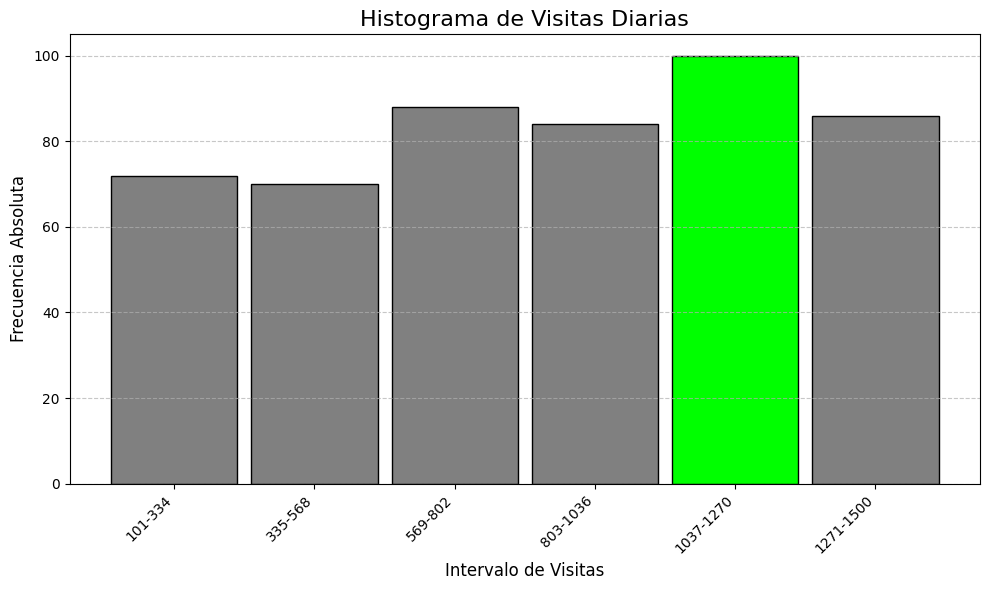

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Encontrar el valor más alto de frecuencia absoluta
max_freq_value = frecuencia_absoluta.max()

# Crear una lista de colores para las barras
colores = ['gray'] * len(frecuencia_absoluta) # Todos grises por defecto

# Encontrar el índice de la barra con la frecuencia más alta para ponerla verde
# Esto coloreará la primera ocurrencia del valor máximo.
max_freq_index = frecuencia_absoluta.tolist().index(max_freq_value)
colores[max_freq_index] = 'lime' # Color verde brillante para el valor más alto

# Crear el histograma utilizando las frecuencias calculadas
plt.bar(frecuencia_absoluta.index.astype(str), # Eje X: etiquetas de las clases
        frecuencia_absoluta.values,           # Eje Y: valores de frecuencia absoluta
        color=colores,                        # Colores definidos
        edgecolor='black',                    # Borde de las barras
        width=0.9                             # Ancho de las barras
       )

plt.title('Histograma de Visitas Diarias', fontsize=16)
plt.xlabel('Intervalo de Visitas', fontsize=12)
plt.ylabel('Frecuencia Absoluta', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X para que no se solapen
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.tight_layout() # Ajustar el diseño para evitar recortes
plt.show()

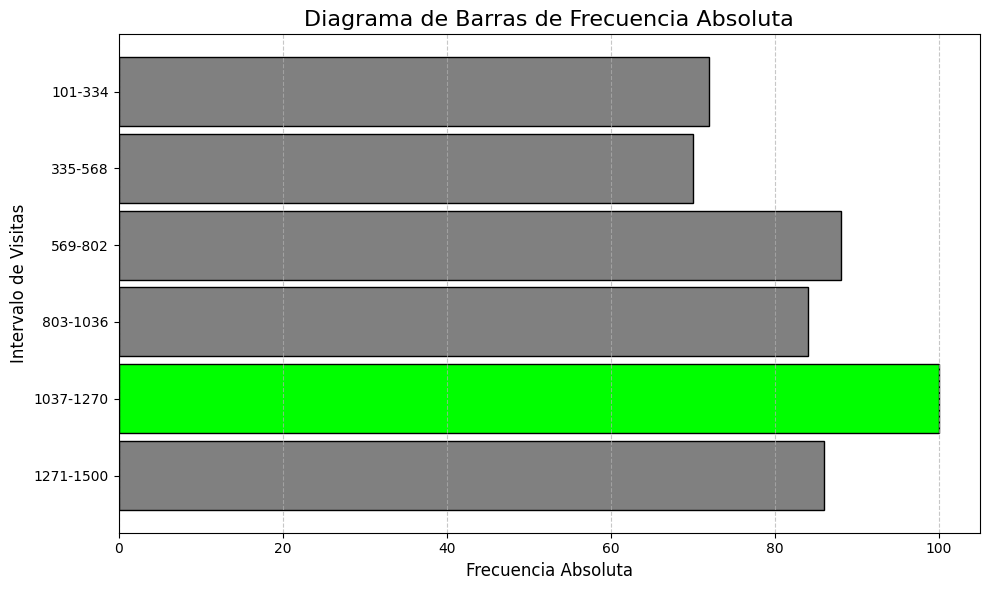

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Encontrar el valor más alto de frecuencia absoluta
max_freq_value = frecuencia_absoluta.max()

# Crear una lista de colores para las barras
colores = ['gray'] * len(frecuencia_absoluta) # Todos grises por defecto

max_freq_index = frecuencia_absoluta.tolist().index(max_freq_value)
colores[max_freq_index] = 'lime' # Color verde brillante para el valor más alto

# Crear el diagrama de barras horizontal
# Usamos plt.barh() para barras horizontales
plt.barh(frecuencia_absoluta.index.astype(str), # Eje Y: etiquetas de las clases
         frecuencia_absoluta.values,           # Eje X: valores de frecuencia absoluta
         color=colores,                        # Colores definidos
         edgecolor='black',                    # Borde de las barras
         height=0.9                            # Altura de las barras (análogo a 'width' en bar)
        )

plt.title('Diagrama de Barras de Frecuencia Absoluta', fontsize=16)
plt.xlabel('Frecuencia Absoluta', fontsize=12) # Ahora el eje X es la frecuencia
plt.ylabel('Intervalo de Visitas', fontsize=12) # Ahora el eje Y son los intervalos
plt.gca().invert_yaxis() # Invertir el eje Y para que la primera clase esté arriba, si lo deseas
plt.grid(axis='x', linestyle='--', alpha=0.7) # Cuadrícula en el eje X
plt.tight_layout() # Ajustar el diseño para evitar recortes
plt.show()

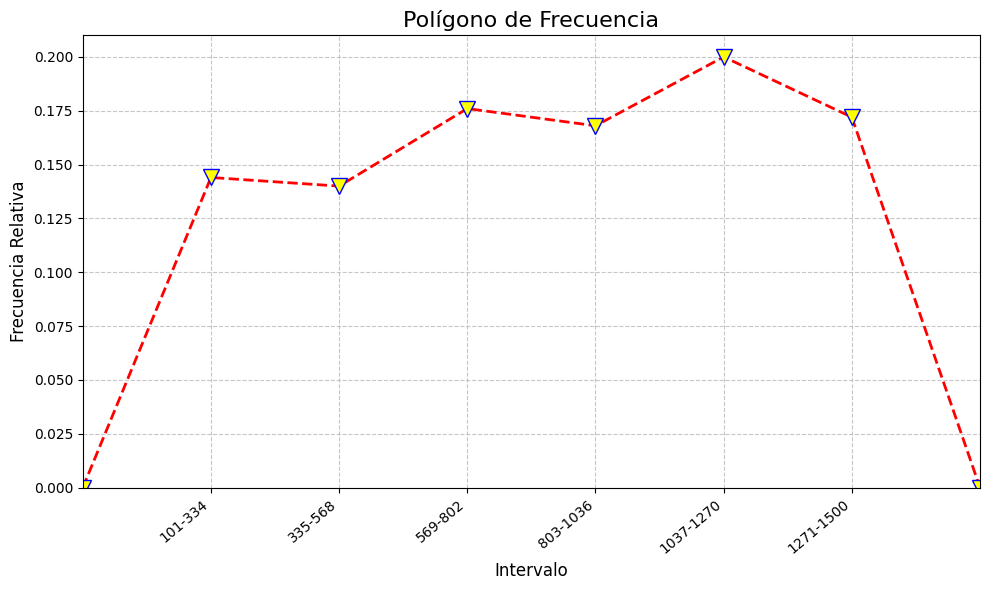

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(42) # Para reproducibilidad de los resultados
visitas_diarias = np.random.randint(100, 1501, 500) # Números enteros entre 100 y 1500 visitas

num_clases = 6
min_visitas = visitas_diarias.min()
max_visitas = visitas_diarias.max()
amplitud_clase = (max_visitas - min_visitas) / num_clases

if amplitud_clase == 0:
    amplitud_clase = 1
amplitud_clase = np.ceil(amplitud_clase)

limites_clases = [min_visitas + i * amplitud_clase for i in range(num_clases + 1)]
limites_clases[-1] = max_visitas if limites_clases[-1] < max_visitas else limites_clases[-1] + 1

etiquetas_clases = []
for i in range(num_clases):
    inicio = int(limites_clases[i])
    fin = int(limites_clases[i+1] - 1)
    if i == num_clases - 1:
        fin = int(max_visitas)
    etiquetas_clases.append(f'{inicio}-{fin}')

clases = pd.cut(visitas_diarias, bins=limites_clases, right=False, labels=etiquetas_clases, include_lowest=True)
frecuencia_absoluta = clases.value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / len(visitas_diarias)

# --- Preparación de los datos para el Polígono de Frecuencias (Corrección aquí) ---

# Inicializa la lista puntos_medios en cada ejecución para evitar acumulación
puntos_medios = []
for label in frecuencia_relativa.index:
    parts = label.split('-')
    try:
        start = float(parts[0])
        end = float(parts[1])
        puntos_medios.append((start + end) / 2)
    except (ValueError, IndexError):
        print(f"Advertencia: No se pudo parsear el rango o la etiqueta '{label}' para calcular el punto medio. Se usará 0.")
        puntos_medios.append(0)

# Aquí creamos la Serie de Pandas con los puntos medios.
# Ya no necesitamos sort_index() en este paso si frecuencia_relativa ya está ordenada por índice.
puntos_medios_series = pd.Series(puntos_medios, index=frecuencia_relativa.index)

# Los índices numéricos para el eje X de la gráfica.
# Cada clase tendrá una posición numérica: 0, 1, 2, etc.
x_indices = np.arange(len(frecuencia_relativa))

# Las etiquetas reales de los intervalos para mostrar en el eje X.
x_labels = frecuencia_relativa.index.tolist()

x_polygon = [-1] + list(x_indices) + [len(frecuencia_relativa)]
y_polygon = [0.0] + frecuencia_relativa.values.tolist() + [0.0]


# --- Generación del Polígono de Frecuencias ---

plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Graficar el polígono
plt.plot(x_polygon, y_polygon,
         color='red',
         linestyle='--',
         linewidth=2,
         marker='v',
         markersize=11,
         markerfacecolor='yellow',
         markeredgecolor='blue'
        )

# Configuración de los ejes y título
plt.title('Polígono de Frecuencia', fontsize=16)
plt.xlabel('Intervalo', fontsize=12)
plt.ylabel('Frecuencia Relativa', fontsize=12)

# Establecer los ticks del eje X y sus etiquetas
# Las posiciones de los ticks serán los índices numéricos de las clases (0, 1, 2...)
# y sus etiquetas serán los nombres de los intervalos de clase.
plt.xticks(x_indices,        # Posiciones numéricas donde se colocarán los ticks
           x_labels,         # Las etiquetas de texto de los intervalos
           rotation=40, ha='right')

# Asegurar que los límites del eje X abarquen todos los puntos del polígono
plt.xlim(x_polygon[0], x_polygon[-1])

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

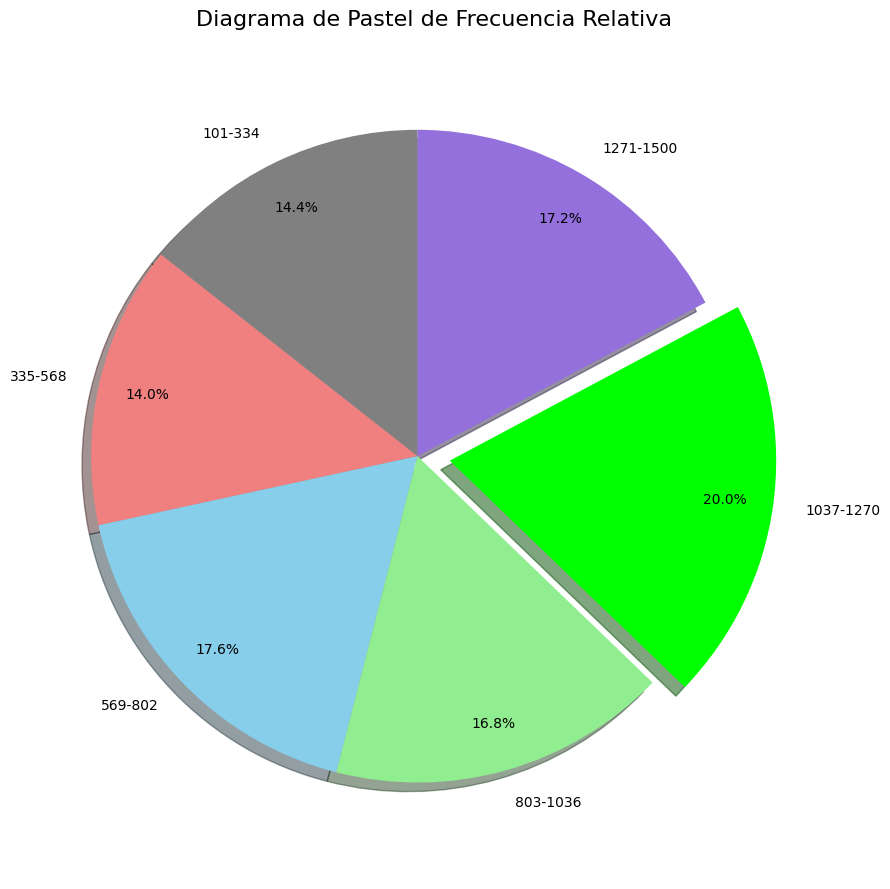

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Generación de los datos y cálculos de frecuencias (completo, para asegurar la consistencia) ---
# Si ya tienes estas variables disponibles en tu entorno (kernel no reiniciado),
# puedes comentar o borrar estas líneas.

np.random.seed(42) # Para reproducibilidad de los resultados
visitas_diarias = np.random.randint(100, 1501, 500) # Números enteros entre 100 y 1500 visitas

num_clases = 6
min_visitas = visitas_diarias.min()
max_visitas = visitas_diarias.max()
amplitud_clase = (max_visitas - min_visitas) / num_clases

if amplitud_clase == 0:
    amplitud_clase = 1
amplitud_clase = np.ceil(amplitud_clase)

limites_clases = [min_visitas + i * amplitud_clase for i in range(num_clases + 1)]
limites_clases[-1] = max_visitas if limites_clases[-1] < max_visitas else limites_clases[-1] + 1

etiquetas_clases = []
for i in range(num_clases):
    inicio = int(limites_clases[i])
    fin = int(limites_clases[i+1] - 1)
    if i == num_clases - 1:
        fin = int(max_visitas)
    etiquetas_clases.append(f'{inicio}-{fin}')

clases = pd.cut(visitas_diarias, bins=limites_clases, right=False, labels=etiquetas_clases, include_lowest=True)
frecuencia_absoluta = clases.value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / len(visitas_diarias) # Esta es la que usaremos para el pastel

# --- Preparación para el Diagrama de Pastel ---

# Encontrar el valor más alto de frecuencia relativa
max_rel_freq_value = frecuencia_relativa.max()

# Crear una lista para "explotar" (separar) los sectores
# Inicialmente, ningún sector está separado (explode = 0)
explode = [0] * len(frecuencia_relativa)

# Crear una lista de colores para los sectores
# Definimos una paleta de colores contrastantes.
# Asegúrate de tener suficientes colores para todas tus clases.
colores_pastel = ['gray', 'lightcoral', 'skyblue', 'lightgreen', 'gold', 'mediumpurple', 'salmon', 'darkkhaki']

# Encontrar el índice de la frecuencia relativa más alta
max_freq_index = frecuencia_relativa.tolist().index(max_rel_freq_value)

# Asignar el color verde al sector con la frecuencia más alta
colores_pastel[max_freq_index] = 'lime' # Color verde brillante

# "Explorar" (separar) el sector con la frecuencia más alta
explode[max_freq_index] = 0.1 # Valor de separación (cuánto se "sale" del pastel)

# --- Generación del Diagrama de Pastel ---

plt.figure(figsize=(9, 9)) # Ajusta el tamaño de la figura para un pastel más grande

# `autopct` formatea los porcentajes en el gráfico
# `startangle` rota el gráfico para una mejor visualización
# `pctdistance` es la distancia de los porcentajes desde el centro
# `textprops` es para el tamaño de fuente del texto del porcentaje
plt.pie(frecuencia_relativa,
        explode=explode,
        labels=frecuencia_relativa.index, # Etiquetas de los intervalos
        colors=colores_pastel,
        autopct='%1.1f%%', # Formato para mostrar porcentajes con un decimal
        shadow=True,       # Añadir una sombra para un efecto 3D
        startangle=90,     # Rotar el inicio del primer sector
        pctdistance=0.85,  # Distancia de los porcentajes desde el centro
        textprops={'fontsize': 10} # Tamaño de la fuente de los porcentajes
       )

plt.title('Diagrama de Pastel de Frecuencia Relativa', fontsize=16)
plt.axis('equal') # Asegura que el pastel sea circular.
plt.tight_layout() # Ajustar el diseño para evitar recortes
plt.show()

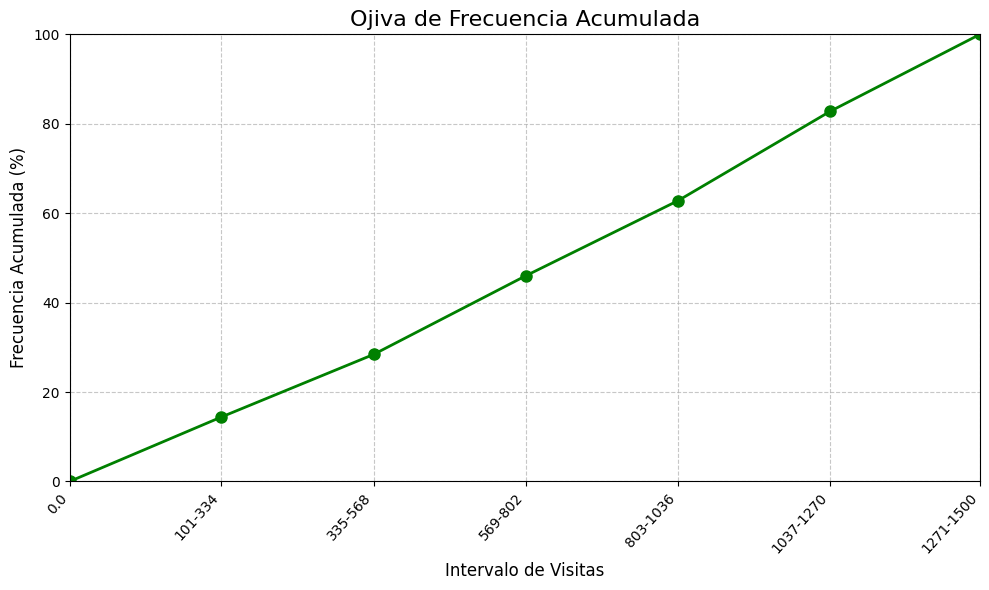

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


np.random.seed(42) # Para reproducibilidad de los resultados
visitas_diarias = np.random.randint(100, 1501, 500) # Números enteros entre 100 y 1500 visitas

num_clases = 6
min_visitas = visitas_diarias.min()
max_visitas = visitas_diarias.max()
amplitud_clase = (max_visitas - min_visitas) / num_clases

if amplitud_clase == 0:
    amplitud_clase = 1
amplitud_clase = np.ceil(amplitud_clase)

limites_clases = [min_visitas + i * amplitud_clase for i in range(num_clases + 1)]
limites_clases[-1] = max_visitas if limites_clases[-1] < max_visitas else limites_clases[-1] + 1

etiquetas_clases = []
for i in range(num_clases):
    inicio = int(limites_clases[i])
    fin = int(limites_clases[i+1] - 1)
    if i == num_clases - 1:
        fin = int(max_visitas)
    etiquetas_clases.append(f'{inicio}-{fin}')

clases = pd.cut(visitas_diarias, bins=limites_clases, right=False, labels=etiquetas_clases, include_lowest=True)
frecuencia_absoluta = clases.value_counts().sort_index()
frecuencia_relativa = frecuencia_absoluta / len(visitas_diarias)
frecuencia_acumulada_rel = frecuencia_relativa.cumsum() # Esta es la clave para la ojiva


limites_superiores = []
for label in frecuencia_acumulada_rel.index:
    parts = label.split('-')
    try:
        # El límite superior es el segundo número en el rango
        limites_superiores.append(float(parts[1]))
    except (ValueError, IndexError):
        print(f"Advertencia: No se pudo parsear el límite superior de '{label}'. Se usará 0.")
        limites_superiores.append(0)

# El valor de frecuencia acumulada relativa (en porcentaje)
# Multiplicamos por 100 para que el eje Y vaya de 0 a 100.
y_ojiva_porcentaje = (frecuencia_acumulada_rel * 100).tolist()

# Para que la ojiva empiece en 0:
# Añadimos un punto inicial con el límite inferior de la primera clase y frecuencia acumulada 0.
limite_inferior_primera_clase = float(frecuencia_acumulada_rel.index[0].split('-')[0])
x_ojiva = [limite_inferior_primera_clase] + limites_superiores
y_ojiva = [0.0] + y_ojiva_porcentaje

# --- Generación de la Ojiva ---

plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Graficar la ojiva
plt.plot(x_ojiva, y_ojiva,
         color='green',    # Línea verde
         marker='o',       # Marcadores circulares
         markersize=8,     # Tamaño de los marcadores
         linewidth=2,      # Grosor de la línea
         linestyle='-'     # Línea sólida
        )

# Configuración de los ejes y título
plt.title('Ojiva de Frecuencia Acumulada', fontsize=16)
plt.xlabel('Intervalo de Visitas', fontsize=12)
plt.ylabel('Frecuencia Acumulada (%)', fontsize=12)


# Las posiciones de los ticks en el eje X: el inicio de la primera clase y los límites superiores
xticks_positions = [limite_inferior_primera_clase] + limites_superiores

# Las etiquetas para esos ticks: '0' y las etiquetas de las clases
# La imagen de ejemplo usa los límites de los intervalos. Vamos a replicar eso.
xticks_labels = [f'{int(limite_inferior_primera_clase)}'] + [f'{int(l)}' for l in limites_superiores]

x_ticks_values = [limite_inferior_primera_clase] + [float(label.split('-')[0]) for label in frecuencia_acumulada_rel.index]
x_ticks_labels = ['0.0'] + frecuencia_acumulada_rel.index.tolist() # Las etiquetas de los intervalos.


x_ojiva_plot = [float(frecuencia_acumulada_rel.index[0].split('-')[0])] # Límite inferior de la primera clase
for label in frecuencia_acumulada_rel.index:
    x_ojiva_plot.append(float(label.split('-')[1])) # Límite superior de cada clase

# Puntos Y: 0%, luego las frecuencias acumuladas en porcentaje.
y_ojiva_plot = [0.0] + (frecuencia_acumulada_rel * 100).tolist()



plt.xticks(x_ojiva_plot,          # Posiciones numéricas de los ticks (los límites de los intervalos)
           ['0.0'] + frecuencia_acumulada_rel.index.tolist(), # Las etiquetas de los intervalos
           rotation=48, ha='right')

plt.grid(True, linestyle='--', alpha=0.7) # Cuadrícula
plt.ylim(0, 100) # El eje Y debe ir de 0 a 100
plt.xlim(x_ojiva_plot[0], x_ojiva_plot[-1]) # Asegurar que el eje X abarque todos los puntos
plt.tight_layout() # Ajustar el diseño
plt.show()
